
# Sécurité dans les réseaux et protection de contenus audio-visuels
## Membre

| Prénom   |      NOM      |  Nombre etudiant |
|----------|:-------------:|------:|
| Duong Phuc Tai |  NGUYEN | 12108339 |
| Kamilia |    RAHIL   |   12109923 |

## TP3 – SPREAD SPECTRUM WATERMARKING
1. Off-the-shelf random number generators
+ Principles
+ Uniform distributed generators
+ Gaussian distributed generators
2. Correlation functions
+ Concept
+ Graphical representation and properties
+ Towards CDMA
3. CDMA-based watermarking
4. Conclusion

### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## criteria library
# from sklearn.metrics import mean_squared_error as compute_mse
# from skimage.metrics import peak_signal_noise_ratio as compute_psnr
# from skimage.metrics import structural_similarity as compute_ssim


In [2]:
## set the necessary path

_DATA = './data'
_RESULT = './result'

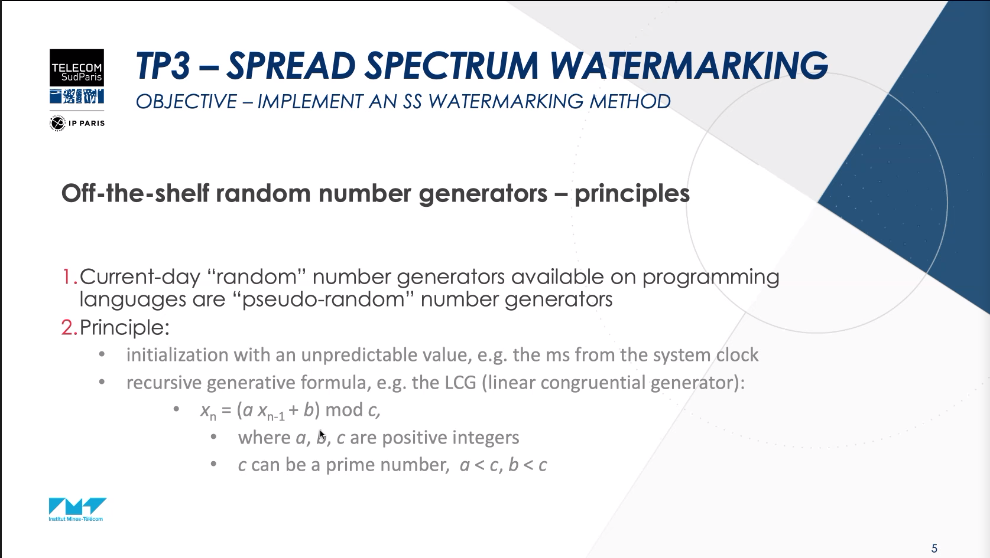
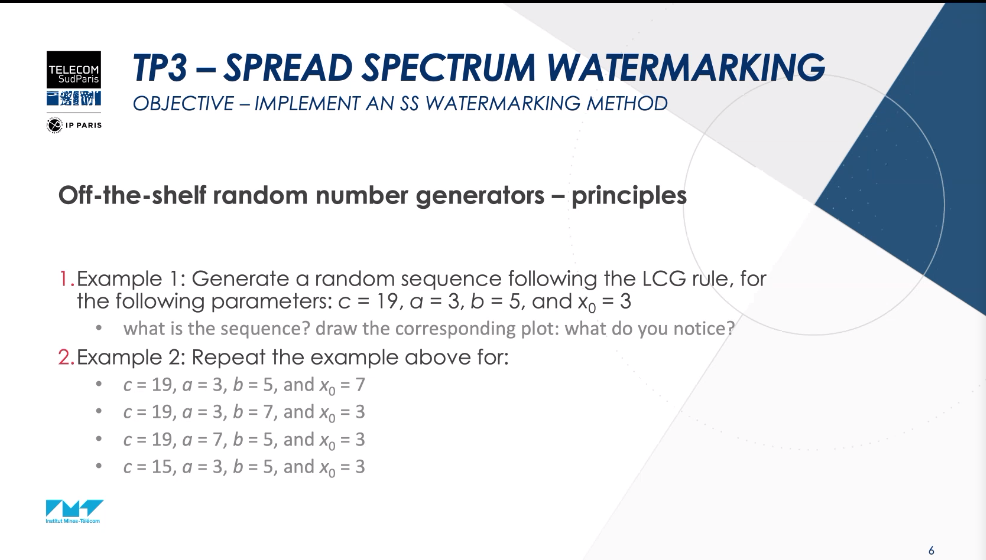

In [3]:
def lcg(c, a, b, x0):
    x = np.zeros(c)
    x[0] = x0
    for i in range(1,c):
        x[i] = np.mod((a*x[i-1] + b), c)
    return x

[ 3. 14.  9. 13.  6.  4. 17. 18.  2. 11.  0.  5.  1.  8. 10. 16. 15. 12.
  3.]


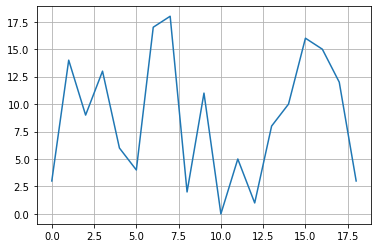

In [4]:
seq_rand = lcg(c=19, a=3, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]


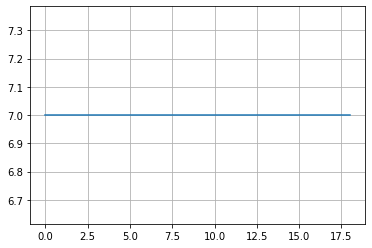

In [5]:
seq_rand = lcg(c=19, a=3, b=5, x0=7)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 16. 17.  1. 10. 18.  4.  0.  7.  9. 15. 14. 11.  2. 13.  8. 12.  5.
  3.]


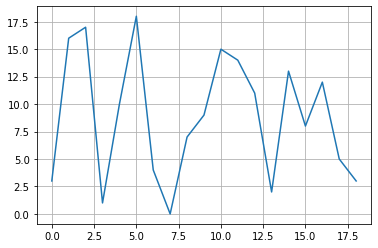

In [6]:
seq_rand = lcg(c=19, a=3, b=7, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.
  3.]


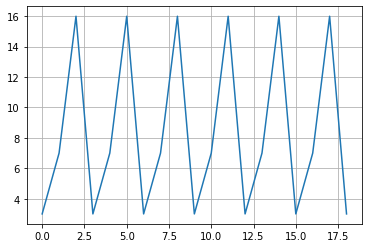

In [7]:
seq_rand = lcg(c=19, a=7, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 14.  2. 11.  8. 14.  2. 11.  8. 14.  2. 11.  8. 14.  2.]


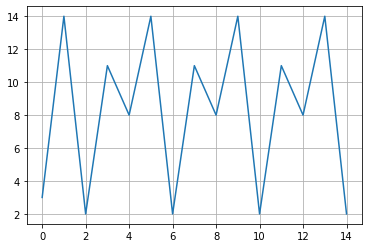

In [8]:
seq_rand = lcg(c=15, a=3, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

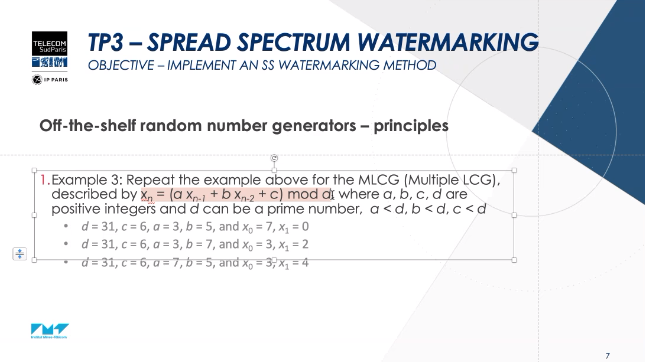

In [9]:
def mlcg(d, c, a, b, x0, x1):
    x = np.zeros(d)
    x[0] = x0
    x[1] = x1
    for i in range(1,d):
        x[i] = np.mod((a*x[i-1] + b*x[i-2] + c), d)
    return x

[ 7. 27. 29. 11. 29. 24.  6. 20.  3. 22. 25.  5. 22.  4.  4.  7. 16. 27.
 12. 22.  8. 16.  1. 27. 30. 14. 12. 19. 30.  5. 16.]


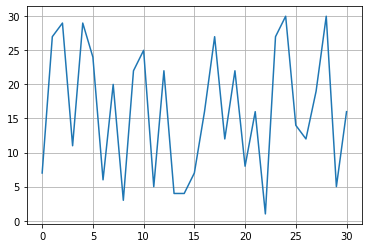

In [10]:
seq_rand = mlcg(d=31, c=6, a=3, b=5, x0=7, x1=0)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 15. 10. 17.  3. 10. 26. 30. 30. 27. 18.  1. 11. 15.  4. 30.  0. 30.
  3.  8. 20. 29. 16.  9. 21.  8. 22.  4. 17. 23.  8.]


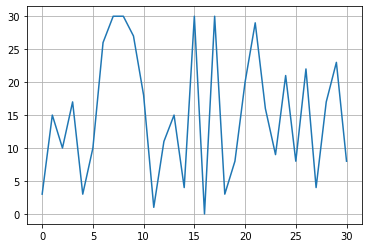

In [11]:
seq_rand = mlcg(d=31, c=6, a=3, b=7, x0=3, x1=2)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 27. 24. 30. 26. 28. 22. 21. 15. 30. 12. 23. 10.  5. 29. 17. 22. 28.
  2.  5. 20. 16.  1.  0. 11. 21. 22. 17. 18.  0.  3.]


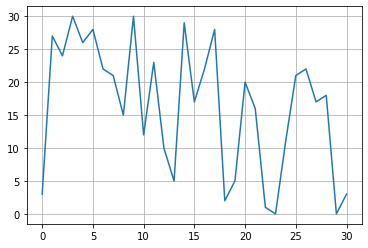

In [12]:
seq_rand = mlcg(d=31, c=6, a=7, b=5, x0=3, x1=4)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

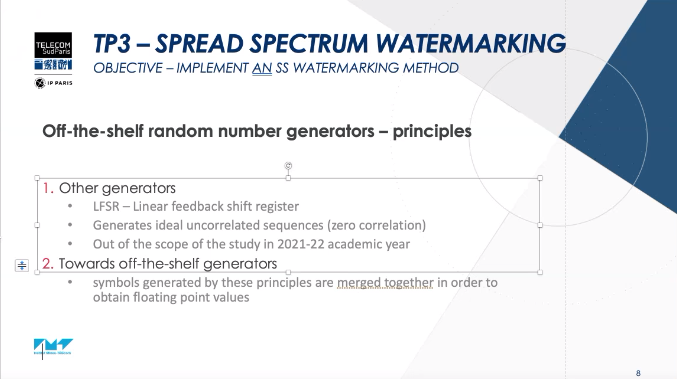
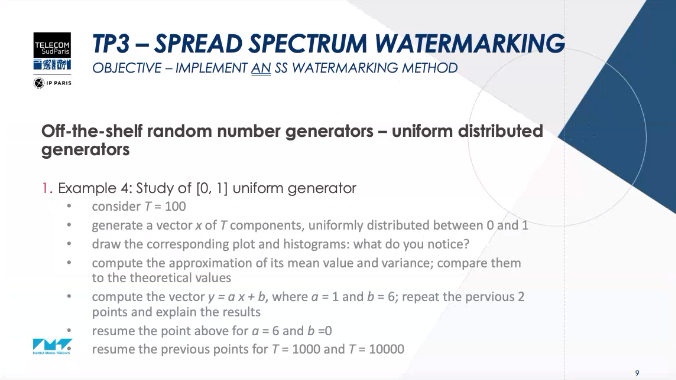

Mean: 16.387; Variance: 95.140


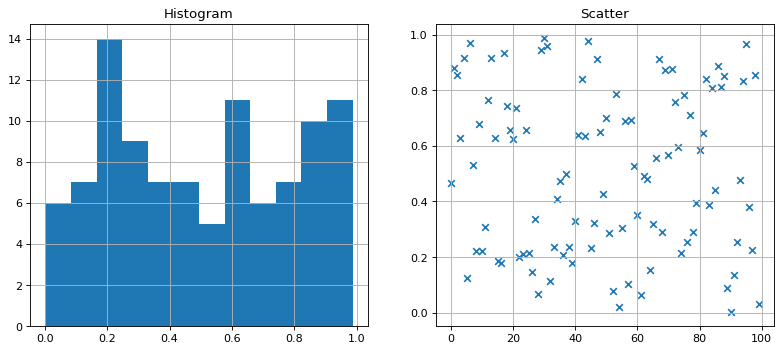

In [13]:
T = 100
seq_uni = np.random.rand(T)
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(seq_uni, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), seq_uni,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(seq_rand):.3f}; Variance: {np.var(seq_rand):.3f}') 

Mean: 6.508; Variance: 0.084


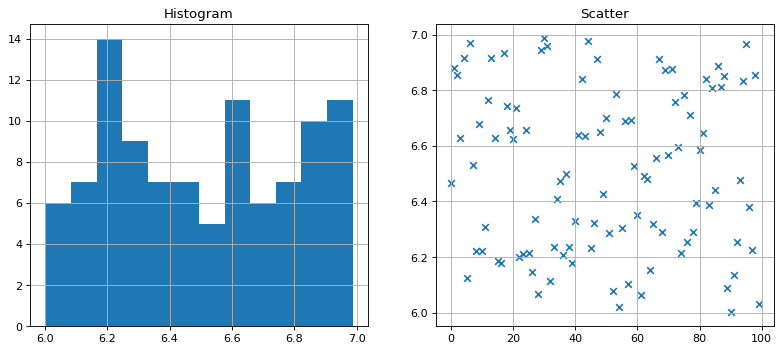

In [14]:
a = 1
b = 6
y = seq_uni*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y,  marker='x')
plt.title("Scatter")
plt.grid()

print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean: 3.050; Variance: 3.024


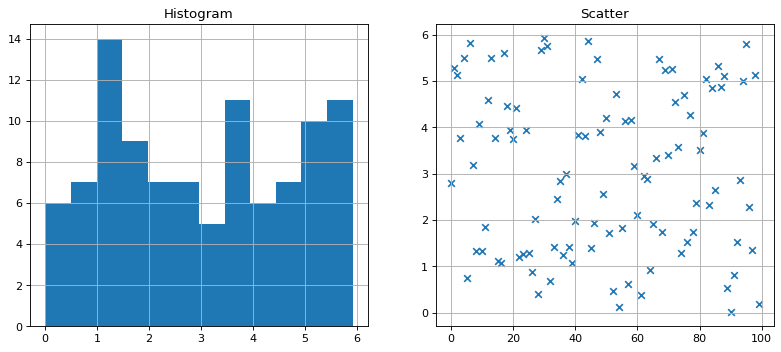

In [15]:
a = 6
b = 0
y = seq_uni*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean: 0.004; Variance: 0.987


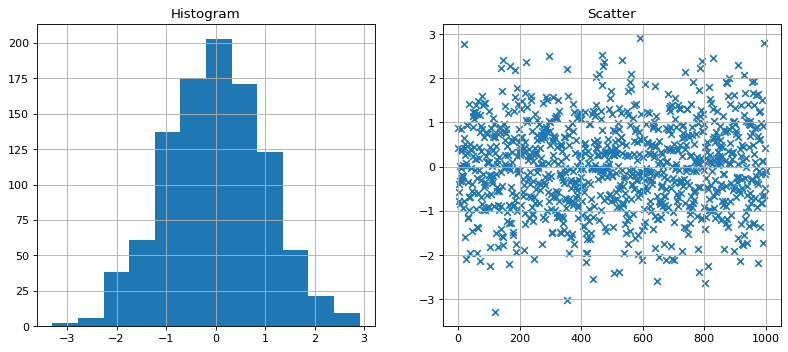

In [16]:
T = 1000
x = np.random.randn(T)
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(x, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), x,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(x):.3f}; Variance: {np.var(x):.3f}') 

Mean: 6.004; Variance: 0.987


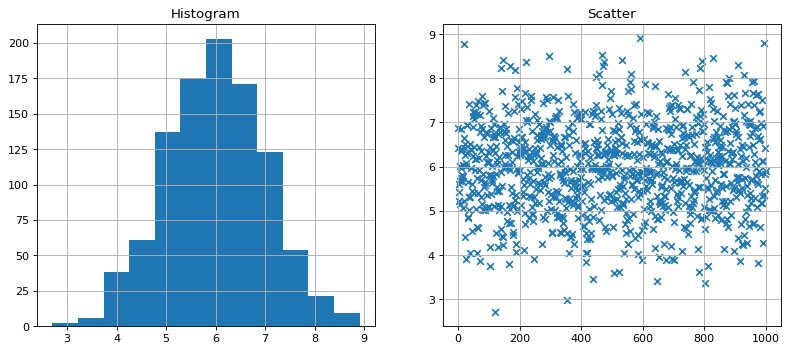

In [17]:
a = 1
b = 6
y = x*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y, marker='x')
plt.title("Scatter")
plt.grid()

print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean: 0.026; Variance: 35.547


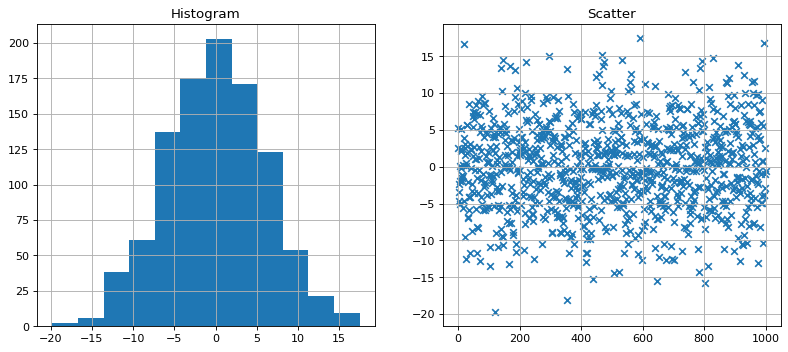

In [18]:
a = 6
b = 0
y = x*a + b

plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(y, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), y,  marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean: {np.mean(y):.3f}; Variance: {np.var(y):.3f}') 

Mean x: 0.010; Variance x: 0.980
Mean y: 0.002; Variance y: 1.041
Mean z: 0.012; Variance z: 2.112


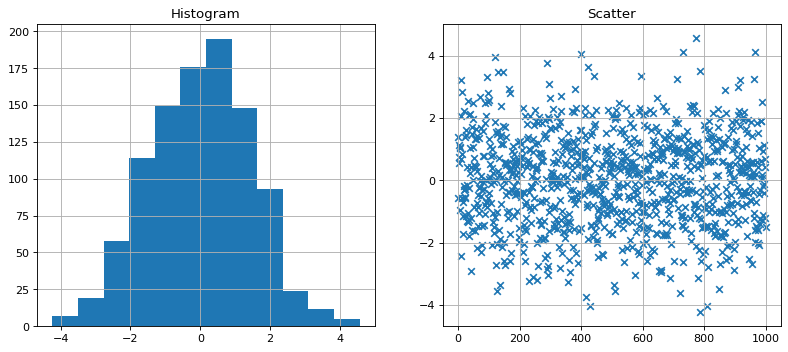

In [19]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = x + y
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(z, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(T), z, marker='x')
plt.title("Scatter")
plt.grid()
print(f'Mean x: {np.mean(x):.3f}; Variance x: {np.var(x):.3f}') 
print(f'Mean y: {np.mean(y):.3f}; Variance y: {np.var(y):.3f}') 
print(f'Mean z: {np.mean(z):.3f}; Variance z: {np.var(z):.3f}') 

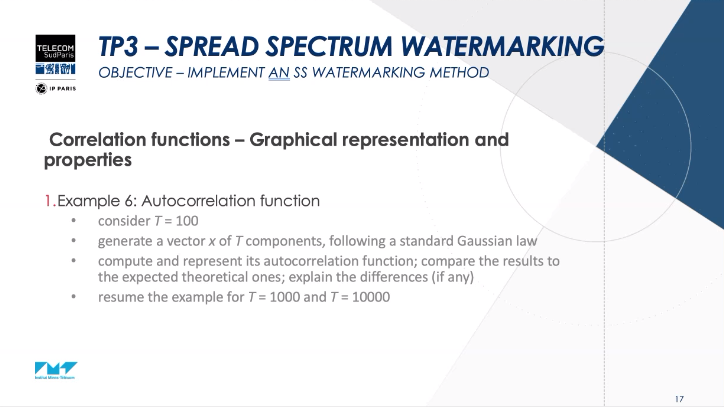

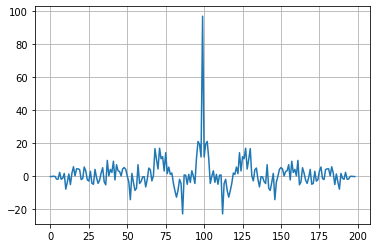

In [20]:
T = 100
x = np.random.randn(T)
x_cor = np.correlate(x, x, mode='full')

plt.plot(x_cor)
plt.grid()

In [21]:
print(f'Sum x: {np.sum(np.multiply(x,x))}')
print(f'Max x Cross-Correlation: {np.max(x_cor)}')

Sum x: 96.78646707716418
Max x Cross-Correlation: 96.78646707716418


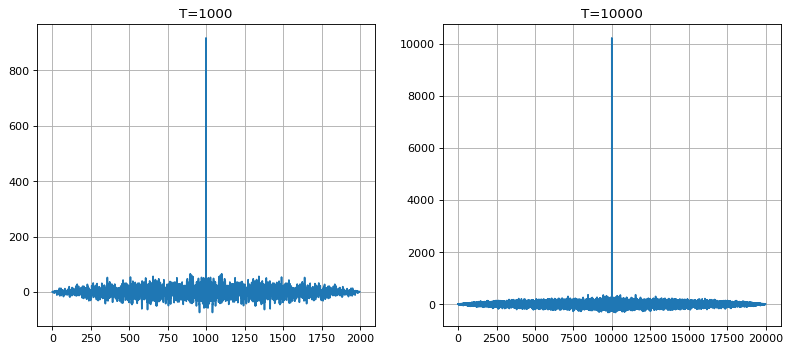

In [22]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
T = 1000
x = np.random.randn(T)
x_cor = np.correlate(x, x, mode='full')
plt.plot(x_cor)
plt.title('T=' + str(T))
plt.grid()
plt.subplot(1, 2, 2)
T = 10000
x = np.random.randn(T)
x_cor = np.correlate(x, x, mode='full')
plt.plot(x_cor)
plt.title('T=' + str(T))
plt.grid()

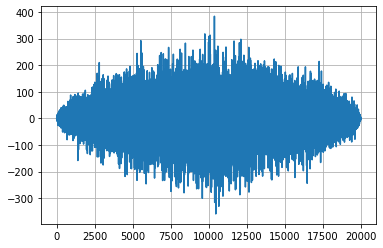

In [23]:
T = 10000
x = np.random.randn(T)
y = np.random.randn(T)

xy_cor = np.correlate(x, y, mode='full')

plt.plot(xy_cor)
plt.grid()

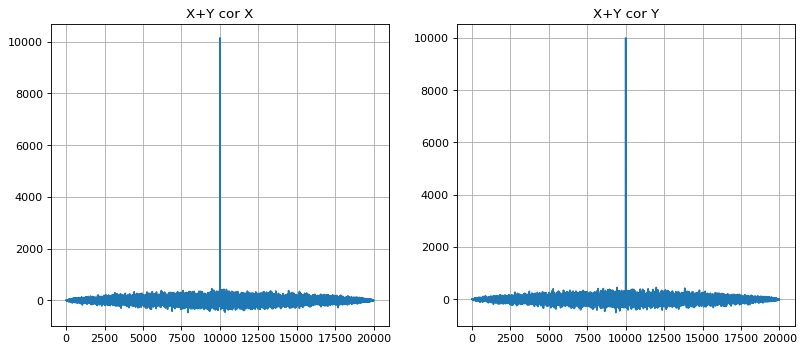

In [24]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
xy_cor = np.correlate(x+y, x, mode='full')
plt.plot(xy_cor)
plt.title('X+Y cor X')
plt.grid()
plt.subplot(1, 2, 2)
xy_cor = np.correlate(x+y, y, mode='full')
plt.plot(xy_cor)
plt.title('X+Y cor Y')
plt.grid()

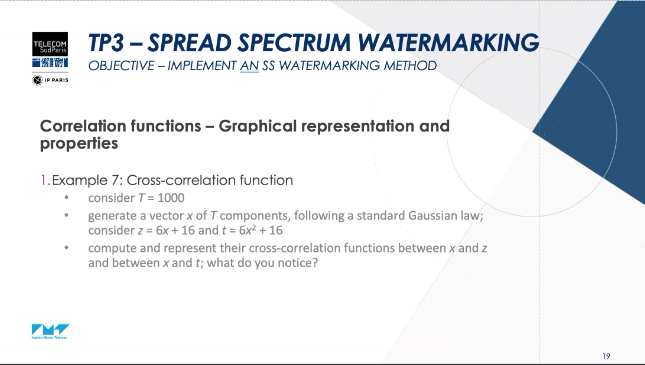

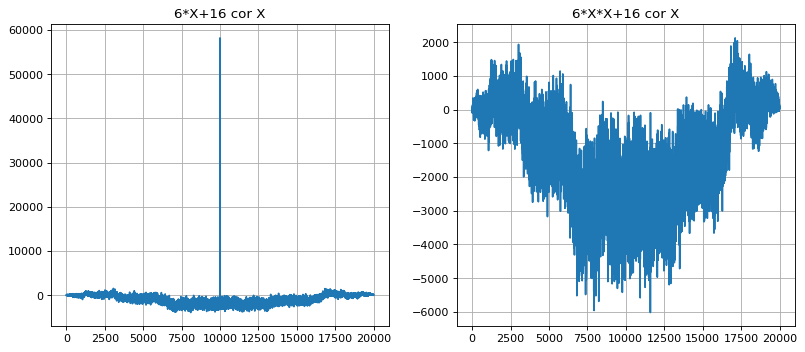

In [25]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
xy_cor = np.correlate(x, 6*x+16, mode='full')
plt.plot(xy_cor)
plt.title('6*X+16 cor X')
plt.grid()
plt.subplot(1, 2, 2)
xy_cor = np.correlate(x, 6*x*x+16, mode='full')
plt.plot(xy_cor)
plt.title('6*X*X+16 cor X')
plt.grid()

### CDMA

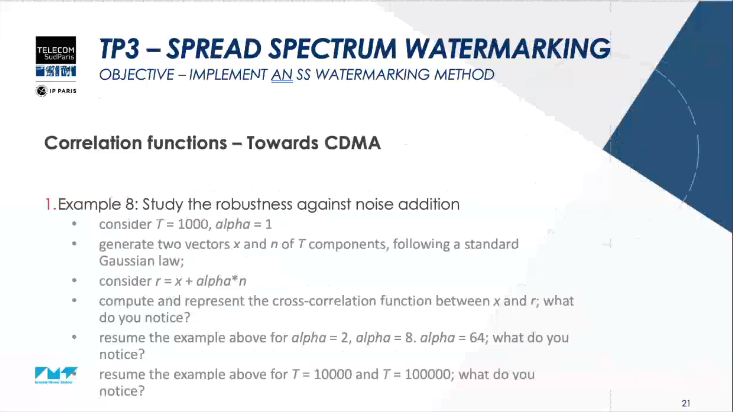

Compute and Represnet the Cross-Correlation with alpha = 1


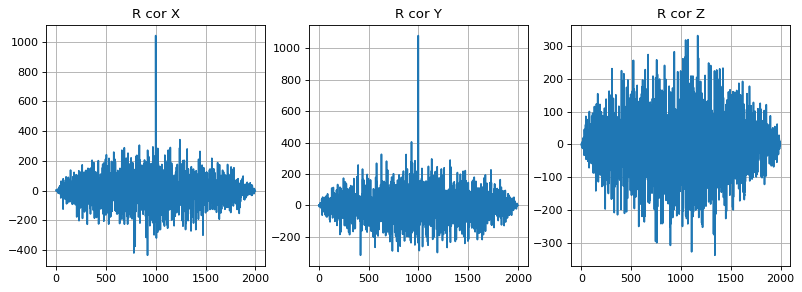

In [26]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = np.random.randn(T)
n = 4*np.random.randn(T)

alpha = 1

r = x + y + alpha*n

print(f'Compute and Represnet the Cross-Correlation with alpha = {alpha}')
plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
xy_cor = np.correlate(r, x, mode='full')
plt.plot(xy_cor)
plt.title('R cor X')
plt.grid()
plt.subplot(1, 3, 2)
xy_cor = np.correlate(r, y, mode='full')
plt.plot(xy_cor)
plt.title('R cor Y')
plt.grid()
plt.subplot(1, 3, 3)
xy_cor = np.correlate(r, z, mode='full')
plt.plot(xy_cor)
plt.title('R cor Z')
plt.grid()

Compute and Represnet the Cross-Correlation with alpha = 2


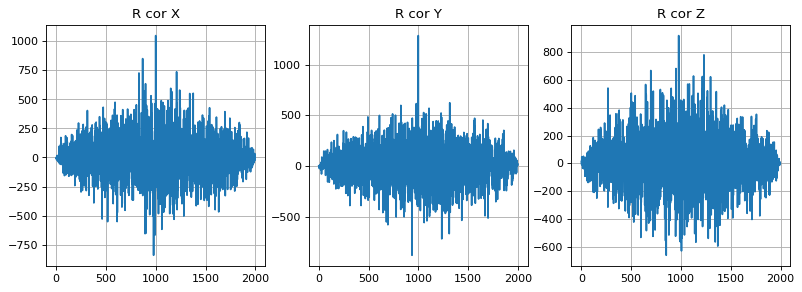

In [27]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = np.random.randn(T)
n = 4*np.random.randn(T)

alpha = 2

r = x + y + alpha*n

print(f'Compute and Represnet the Cross-Correlation with alpha = {alpha}')
plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
xy_cor = np.correlate(r, x, mode='full')
plt.plot(xy_cor)
plt.title('R cor X')
plt.grid()
plt.subplot(1, 3, 2)
xy_cor = np.correlate(r, y, mode='full')
plt.plot(xy_cor)
plt.title('R cor Y')
plt.grid()
plt.subplot(1, 3, 3)
xy_cor = np.correlate(r, z, mode='full')
plt.plot(xy_cor)
plt.title('R cor Z')
plt.grid()

Compute and Represnet the Cross-Correlation with alpha = 8


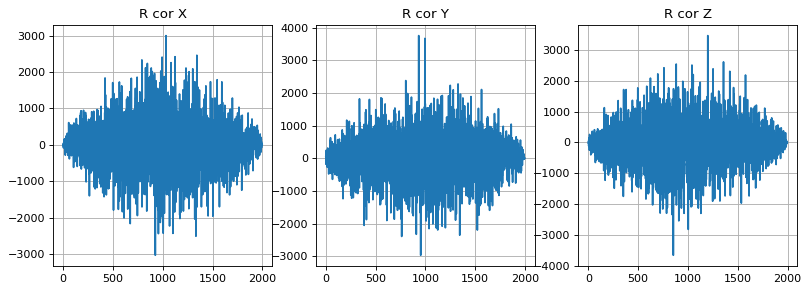

In [28]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = np.random.randn(T)
n = 4*np.random.randn(T)

alpha = 8

r = x + y + alpha*n

print(f'Compute and Represnet the Cross-Correlation with alpha = {alpha}')
plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
xy_cor = np.correlate(r, x, mode='full')
plt.plot(xy_cor)
plt.title('R cor X')
plt.grid()
plt.subplot(1, 3, 2)
xy_cor = np.correlate(r, y, mode='full')
plt.plot(xy_cor)
plt.title('R cor Y')
plt.grid()
plt.subplot(1, 3, 3)
xy_cor = np.correlate(r, z, mode='full')
plt.plot(xy_cor)
plt.title('R cor Z')
plt.grid()

Compute and Represnet the Cross-Correlation with alpha = 64


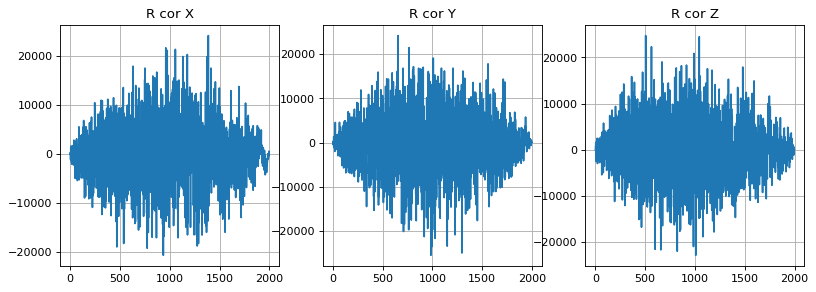

In [29]:
T = 1000
x = np.random.randn(T)
y = np.random.randn(T)
z = np.random.randn(T)
n = 4*np.random.randn(T)

alpha = 64

r = x + y + alpha*n

print(f'Compute and Represnet the Cross-Correlation with alpha = {alpha}')
plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
xy_cor = np.correlate(r, x, mode='full')
plt.plot(xy_cor)
plt.title('R cor X')
plt.grid()
plt.subplot(1, 3, 2)
xy_cor = np.correlate(r, y, mode='full')
plt.plot(xy_cor)
plt.title('R cor Y')
plt.grid()
plt.subplot(1, 3, 3)
xy_cor = np.correlate(r, z, mode='full')
plt.plot(xy_cor)
plt.title('R cor Z')
plt.grid()

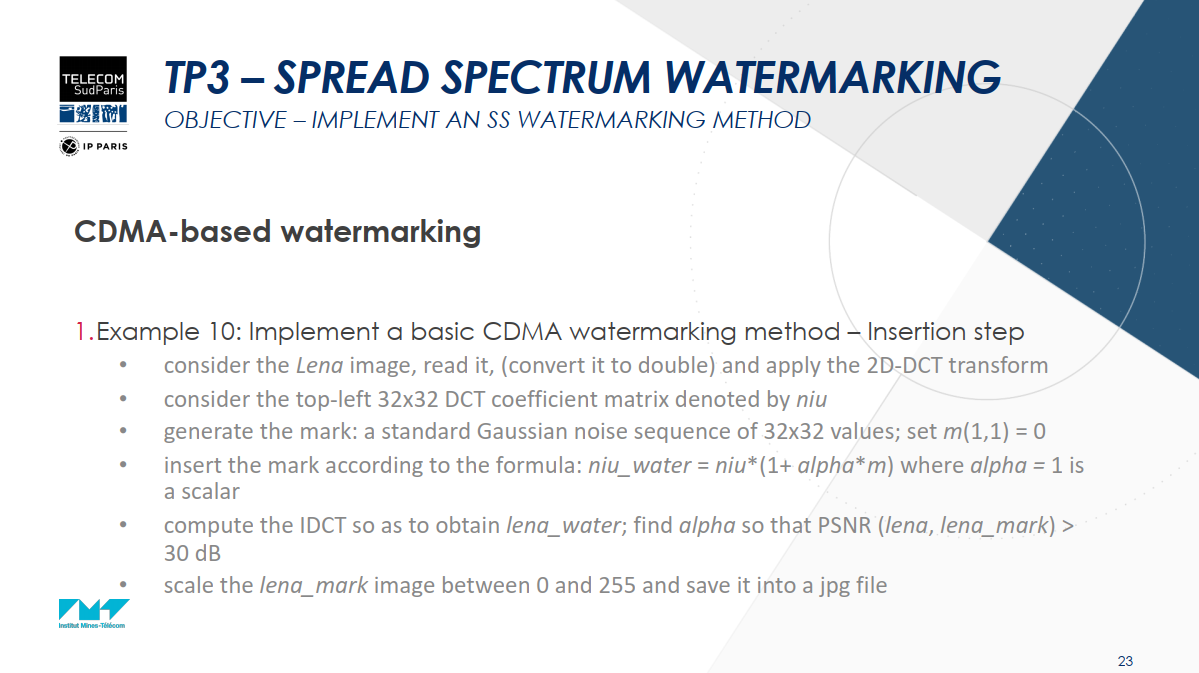

In [30]:
def read_image(img_name, data_fold = _DATA):
    """
    Read the Lena image and represent it as a matrix
    Make the required format conversion
    param:
        img_name: is the image's name file
        data_fold: is the path of data folder which store the images
    return:
        img_arr: is the matrix or array represent the image
    """
    ## read image
    img_bgr = cv2.imread(os.path.join(data_fold, img_name))
    ## convert color space to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_arr = img_gray.copy()
    ## indicate the type of image array
    return img_arr.astype(float)

In [31]:
def compute_psnr(ref, dis):
    """
    calculate the PSNR objective measure score
    param:
        ref: is the reference image
        dis: is the distortion image
    return:
        psnr: PSNR score
    """
    mse = np.mean((ref - dis) ** 2)
    if(mse == 0):
        return 100
    max_pixel = np.max(ref)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [32]:
lena_arr = read_image('lena.jpg')
baboon_arr = read_image('baboon.jpg')

PSNR: 15.942198933325432


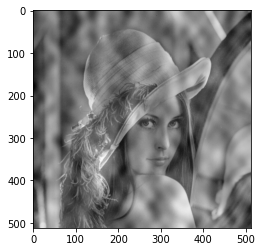

In [33]:
## DCT transform using OpenCV
lena_dct = cv2.dct(lena_arr)
# print(np.min(lena_dct), np.max(lena_dct))
# plt.figure(figsize=(10, 10), dpi=80)
# plt.imshow(lena_dct[:50,:50], cmap='gray')
# plt.colorbar()
## consider the top-left 32x32 DCT coefficient matrix denoted by niu
niu = lena_dct[:32,:32]
## generate the mark: a standard Gaussian noise sequence of 32x32 values; set m(1,1) = 0
m = np.random.randn(32,32)
m[0,0] = 0
## insert the mark
alpha = 1
niu_water = niu*(1+ alpha*m)
## insert niu_water into lena
lena_dct[:32,:32] = niu_water
## inverse DCT
lena_water = cv2.idct(lena_dct)
plt.imshow(lena_water, cmap='gray')
metric_psnr = compute_psnr(lena_arr, lena_water)
print(f'PSNR: {metric_psnr}')

Best PSNR: 31.39541574818491 at alpha: 0.09999999999999969


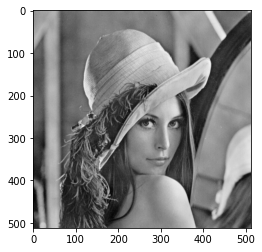

In [34]:
## generate the mark: a standard Gaussian noise sequence of 32x32 values; set m(1,1) = 0
m = np.random.randn(32,32)
m[0,0] = 0
## insert the mark and fine-tuning to find the alpha that the PSNR inverse DCT more than 30dB
alpha = 1
metric_psnr = 0
list_alpha = []
list_metric = []
while (metric_psnr <= 30) and (alpha >= 0):
    ## DCT transform using OpenCV
    lena_dct = cv2.dct(lena_arr)
    ## consider the top-left 32x32 DCT coefficient matrix denoted by niu
    niu = lena_dct[:32,:32]
    niu_water = niu*(1+ alpha*m)
    ## insert niu_water into lena
    lena_dct[:32,:32] = niu_water
    ## inverse DCT
    lena_water = cv2.idct(lena_dct)
    metric_psnr = compute_psnr(lena_arr, lena_water)
    alpha -= 0.05
    list_alpha.append(alpha)
    list_metric.append(metric_psnr)
print(f'Best PSNR: {metric_psnr} at alpha: {alpha}')
plt.imshow(lena_water, cmap='gray')

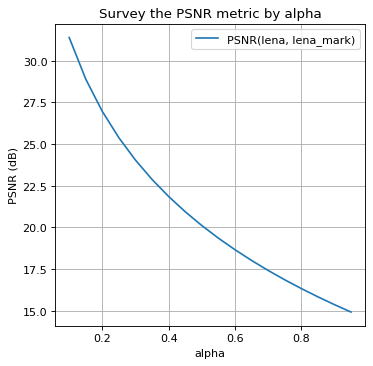

In [35]:
plt.figure(figsize=(5, 5), dpi=80)
plt.plot(list_alpha,list_metric)

plt.legend(['PSNR(lena, lena_mark)'], loc='upper right')
plt.xlabel('alpha')
plt.ylabel('PSNR (dB)')
plt.grid()
plt.title('Survey the PSNR metric by alpha')
plt.show()

In [36]:
lena_water = lena_water.astype(int)
cv2.imwrite('./result/lena_water.jpg', lena_water)

True

In [37]:
!jupyter nbconvert --to script SPRCA_Master3IR-M2-TP3.ipynb

[NbConvertApp] Converting notebook SPRCA_Master3IR-M2-TP3.ipynb to script
[NbConvertApp] Writing 12009 bytes to SPRCA_Master3IR-M2-TP3.py
